### File Information

- **Developer**: Youssef
- **File Name**: ScholarshipHypothesis.ipynb
- **Course**: Data Analytics MSc
- **Purpose**: This file runs a series of tests to analyze aspects of the Predict students' dropout and academic success dataset.

In [2]:
# Import packages
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

In [5]:
# SCHOLARSHIPS AND DROPOUTS

# General Background on Target Column
d = y.query('Target == "Dropout"').Target.count()
g = y.query('Target == "Graduate"').Target.count()
e = y.query('Target == "Enrolled"').Target.count()
print("Target Background\n-----------------")

print(g)
print(e)
print(d)

Target Background
-----------------
2209
794
1421


In [10]:
# General background on Scholarship Column

# Avoid modifying the original DataFrame directly to prevent warnings
X_copy = X.copy()

# Rename the 'Scholarship holder' column to 'sh'
X_copy.rename(columns={'Scholarship holder': 'sh'}, inplace=True)

# Count the number of students with and without scholarships
numS = X_copy.query('sh == 1').sh.count()
numNoS = X_copy.query('sh == 0').sh.count()

# Print the counts
print("Number of students with scholarships:", numS)
print("Number of students without scholarships:", numNoS)

# Variables
# ---------
# Initialize counters for various student categories
dropout_noS = 0  # Number of students without scholarships who drop out
dropout_S = 0  # Number of students with scholarships who drop out
e_G_noS = 0  # Number of students without scholarships who are enrolled or graduate
e_G_S = 0  # Number of students with scholarships who are enrolled or graduate

# Example total student count (update with actual data if available)
total_students = 4424.0

Number of students with scholarships: 1099
Number of students without scholarships: 3325


In [13]:
# Formatting the dataframe
# ------------------------
df = X_copy[['sh']]  # grab scholarship column from X
df = pd.concat([df, y], axis=1, join="inner")  # combine S column with Y column
df = df.reset_index()  # Set the pointer to first value in dataframe

In [15]:
# Iterating through new dataframe
# -------------------------------
for index, row in df.iterrows():
    if row['sh'] == 1:
        if row['Target'] == "Dropout":
            # If got scholarship and Dropout
            dropout_S += 1
        else:
            # If got scholarship and Graduate
            e_G_S += 1
    else:
        if row['Target'] == "Dropout":
            # If no scholarship and Dropout
            dropout_noS += 1
        else:
            # If no scholarship and Graduate
            e_G_noS += 1

# Variables
# The following variables are show the percentage of students
dropNSP = round(((dropout_noS / total_students) * 100), 2)
dropSP = round(((dropout_S / total_students) * 100), 2)
stayNSP = round(((e_G_noS / total_students) * 100), 2)
staySP = round(((e_G_S / total_students) * 100), 2)

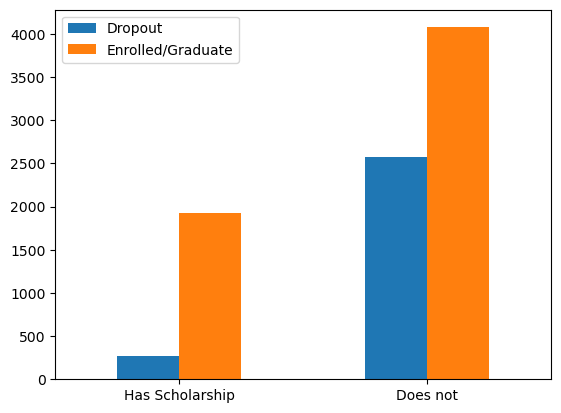

<Figure size 640x480 with 0 Axes>

In [21]:
# Create the data for the bar graph
index = ['Has Scholarship', 'Does not']
dropout = [dropout_S, dropout_noS]
cont = [e_G_S, e_G_noS]
bar_df = pd.DataFrame({'Dropout': dropout, 'Enrolled/Graduate': cont}, index=index)

# Create the bar graph
ax = bar_df.plot.bar(rot=0)

# Save the plot as a .jpg file
plt.savefig('images/scholarshipBARgraph.jpg', dpi=300)

# Display the plot
plt.show()

# Clear the plot
plt.clf()


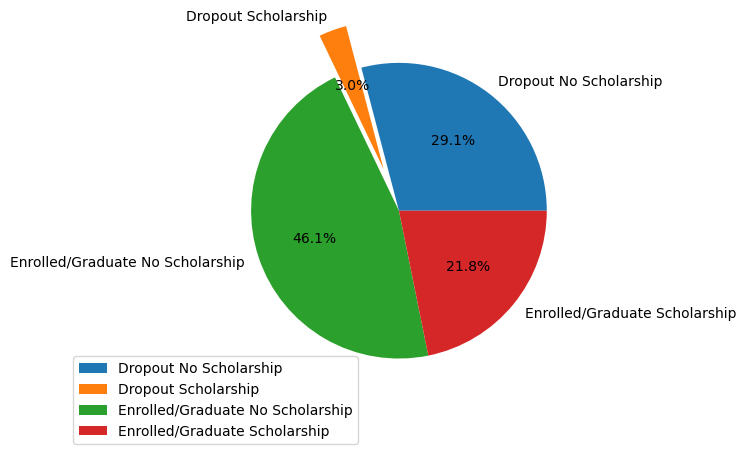

SCHOLARSHIP INFO
----------------
No Scholarship Dropouts: 2574  | 58.18%
Scholarship Dropouts: 268  | 6.06%
No Scholarship continuing students: 4076  | 92.13%
Scholarship continuing students: 1930  | 43.63%


<Figure size 640x480 with 0 Axes>

In [22]:
# Create pie chart
# Saved as .jpg in images folder
# ------------------------------
y = np.array([dropNSP, dropSP, stayNSP, staySP])
mylabels = ["Dropout No Scholarship", "Dropout Scholarship",
            "Enrolled/Graduate No Scholarship", "Enrolled/Graduate Scholarship"]
myexplode = [0, 0.3, 0, 0]


# Function to add percentage values to Pie Chart
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{:.1f}%'.format(pct, v=val)
    return my_format


plt.pie(y, labels=mylabels, explode=myexplode, autopct=autopct_format(y))
plt.legend(bbox_to_anchor=(-0.40, -0.15), loc="lower left")
plt.savefig('images/scholarshipPIEchart.jpg', dpi=300)

# Display the plot
plt.show()

plt.clf()

# Print Data
# -----------
print("SCHOLARSHIP INFO")
print("----------------")
print(f"No Scholarship Dropouts: {dropout_noS}  | "
      f"{dropNSP}%")
print(f"Scholarship Dropouts: {dropout_S}  | "
      f"{dropSP}%")
print(f"No Scholarship continuing students: {e_G_noS}  | "
      f"{stayNSP}%")
print(f"Scholarship continuing students: {e_G_S}  | "
      f"{staySP}%")